<a href="https://colab.research.google.com/github/jasonwashburn/ColabNotebooks/blob/main/05_Multivariable_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from  statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# Actual prices in 1000's
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [15]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing Data - Histograms, Distributions and Bar Charts

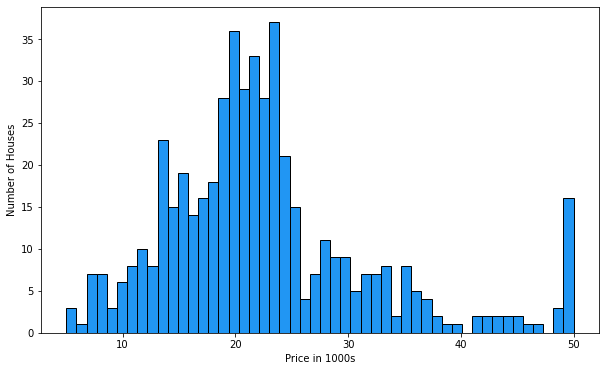

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196F3')
plt.xlabel('Price in 1000s')
plt.ylabel('Number of Houses')
plt.show()

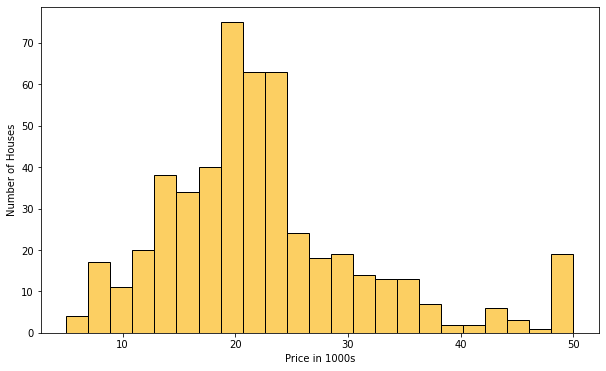

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data['PRICE'], color='#fbc02d')
plt.xlabel('Price in 1000s')
plt.ylabel('Number of Houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351787

In [20]:
data['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [21]:
data['RAD'].mean()

9.549407114624506

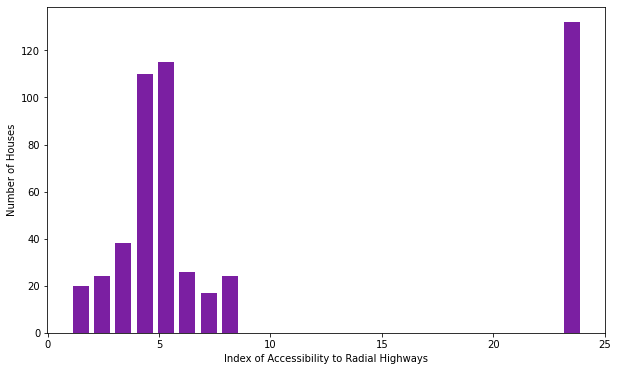

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], color='#7b1fa2', bins=24, rwidth=0.75)
plt.xlabel('Index of Accessibility to Radial Highways')
plt.ylabel('Number of Houses')
plt.show()

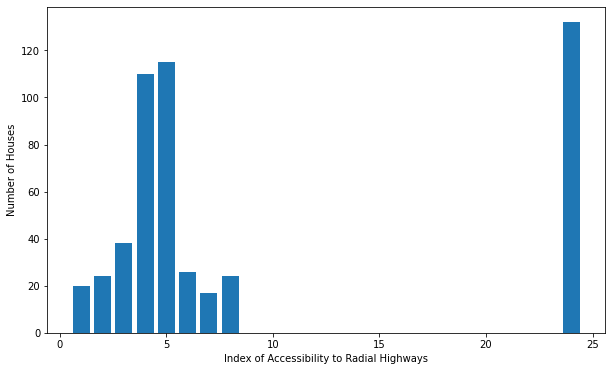

In [23]:
frequency = data['RAD'].value_counts()
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10,6))
plt.xlabel('Index of Accessibility to Radial Highways')
plt.ylabel('Number of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [24]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [25]:
data['PRICE'].min()

5.0

In [26]:
data['PRICE'].max()

50.0

In [27]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [29]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [30]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [31]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [32]:
# Correlation between price and the number of rooms
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [33]:
# Correlation between price and pupil to teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [34]:
data.corr() # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

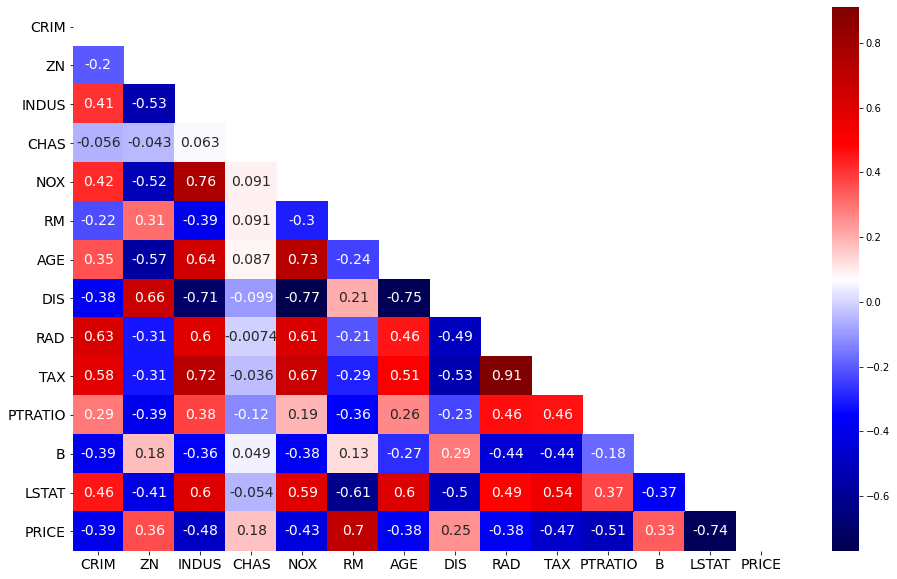

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14}, 
            cmap=cm.seismic)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



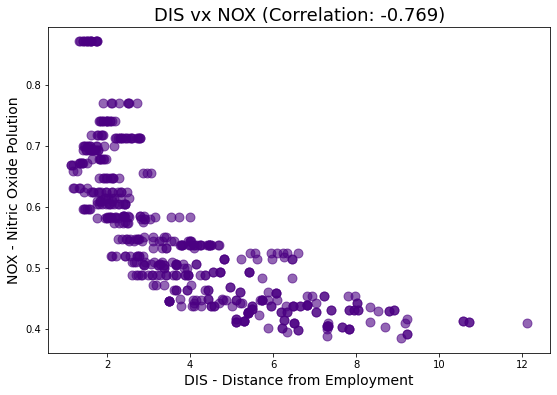

In [37]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f"DIS vx NOX (Correlation: {nox_dis_corr})", fontdict={"size":18})
plt.xlabel("DIS - Distance from Employment", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Polution", fontsize=14)
plt.show()

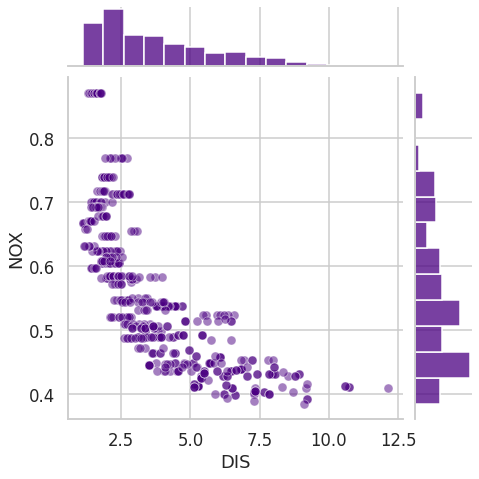

In [38]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

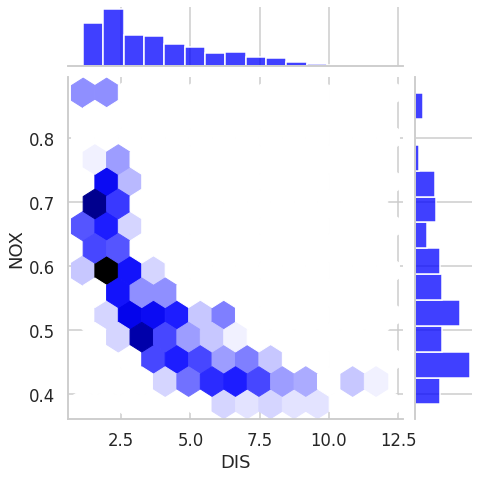

In [39]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, kind='hex',color='blue')
plt.show()

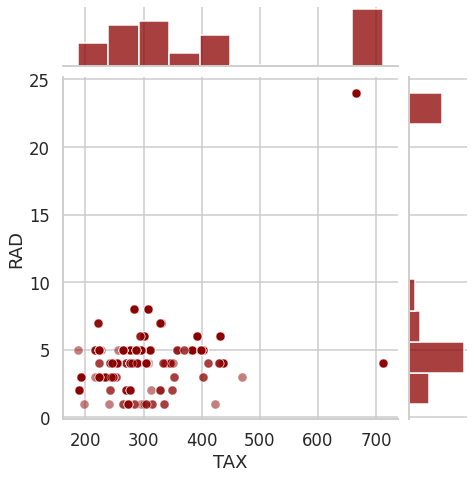

In [40]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

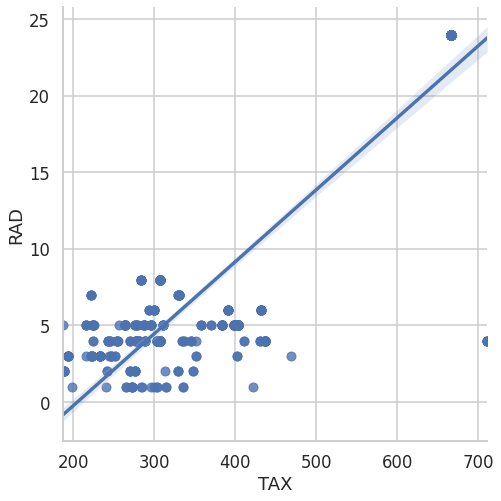

In [41]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

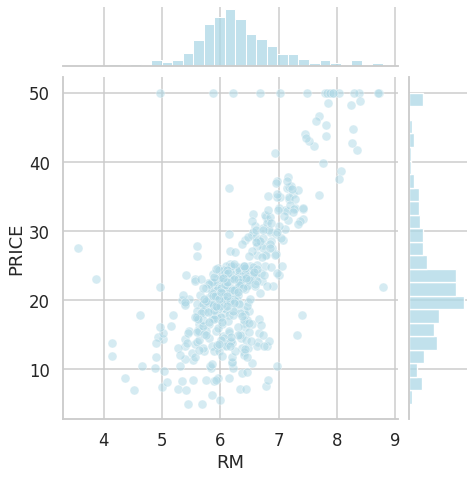

In [42]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['RM'], y=data['PRICE'], height=7, color='lightblue', joint_kws={'alpha':0.5})
plt.show()

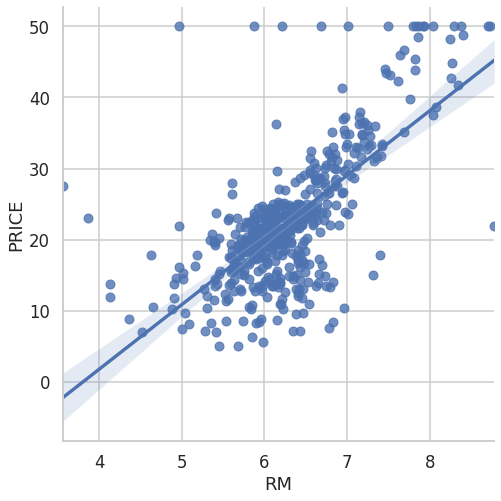

In [43]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)

In [44]:
%%time

#sns.pairplot(data)
#plt.show()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


In [45]:
%%time
#sns.pairplot(data, kind="reg", plot_kws={'scatter_kws': {'alpha': 0.6}, 'line_kws': {'color': 'cyan'}})
#plt.show()

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 8.11 µs


## Training & Test Dataset Split

In [46]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# % of training set
len(X_train) / len(features)

0.7984189723320159

In [47]:
# % of test data
X_test.shape[0] / features.shape[0]

0.2015810276679842

## Multivariable Regression

In [48]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercept", regr.intercept_)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 36.533051382824596
Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115651


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [49]:
data['PRICE'].skew()

1.1080984082549072

In [50]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [51]:
y_log.skew()

-0.33032129530987864

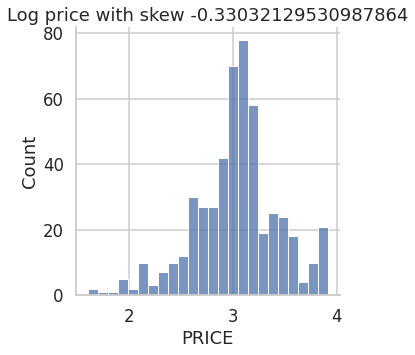

In [52]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

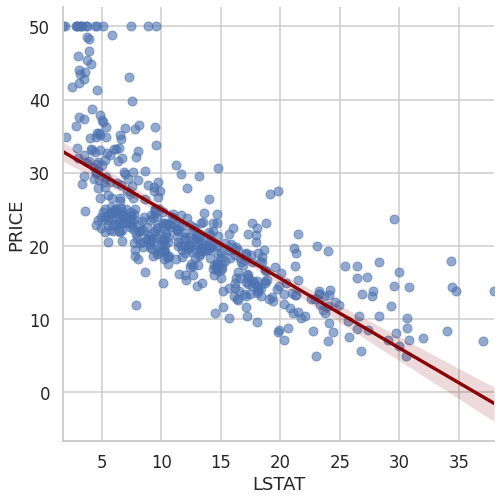

In [53]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})
plt.show()

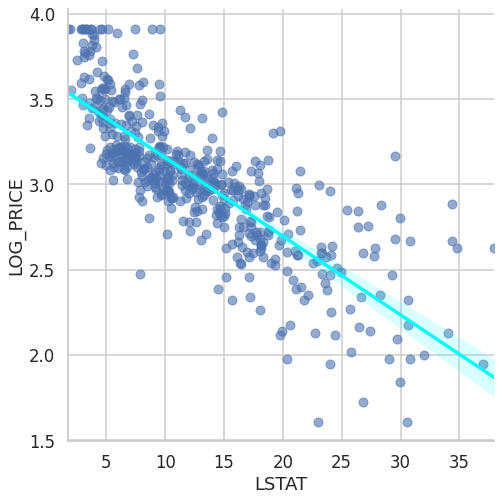

In [54]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression using log prices

In [55]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercept", regr.intercept_)
print('Training data r-squared: ', regr.score(X_train, y_train))

print('Test data r-squared: ', regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 4.059943871775192
Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260735


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [56]:
# Charles River Property Premium
np.e**0.80331

2.232919674052825

## p values and Evaluating Coefficients

In [57]:
X_include_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_include_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 + \alpha _2 NOX + ... + \alpha _12 LSTAT $$

$$ VIF _{TAX} = \frac {1}{(1 - R _{TAX} ^ 2)} $$

In [58]:
variance_inflation_factor(exog=X_include_const.values, exog_idx=1)

1.7145250443932485

In [59]:
X_include_const.columns[1]
print(len(X_include_const))

404


In [60]:
for i in range(1, len(X_include_const.columns)):
    print(f"{X_include_const.columns[i]}: \t{variance_inflation_factor(exog=X_include_const.values, exog_idx=i)}")

CRIM: 	1.7145250443932485
ZN: 	2.3328224265597584
INDUS: 	3.943448822674638
CHAS: 	1.0788133385000576
NOX: 	4.410320817897635
RM: 	1.8404053075678575
AGE: 	3.3267660823099408
DIS: 	4.222923410477865
RAD: 	7.314299817005058
TAX: 	8.508856493040817
PTRATIO: 	1.839911632651406
B: 	1.3386713255364717
LSTAT: 	2.812544292793036


In [61]:
vif = [variance_inflation_factor(exog=X_include_const.values, exog_idx=i) for i in range(len(X_include_const.columns))]
pd.DataFrame({'coef_name': X_include_const.columns,
              'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplication & BIC

In [62]:
# Original Model with log prices and all features
X_include_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_include_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print(f"BIC: {results.bic}")
print(f"r-squared: {results.rsquared}")

BIC: -139.74997769478875
r-squared: 0.7930234826697582


In [63]:
# Reduced Model #1 excluding INDUS
X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_include_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print(f"BIC: {results.bic}")
print(f"r-squared: {results.rsquared}")

BIC: -145.14508855591185
r-squared: 0.7927126289415163


In [64]:
# Reduced Model #1 excluding INDUS & AGE
X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_include_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print(f"BIC: {results.bic}")
print(f"r-squared: {results.rsquared}")



BIC: -149.49934294224656
r-squared: 0.7918657661852815


In [65]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

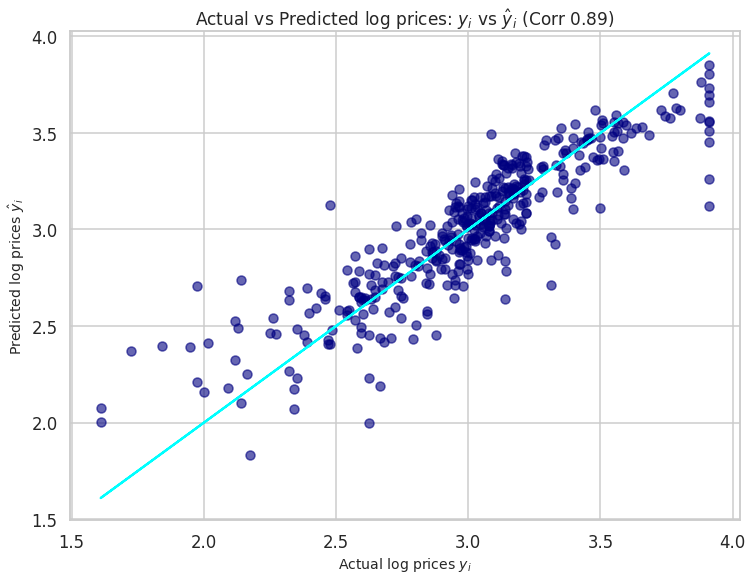

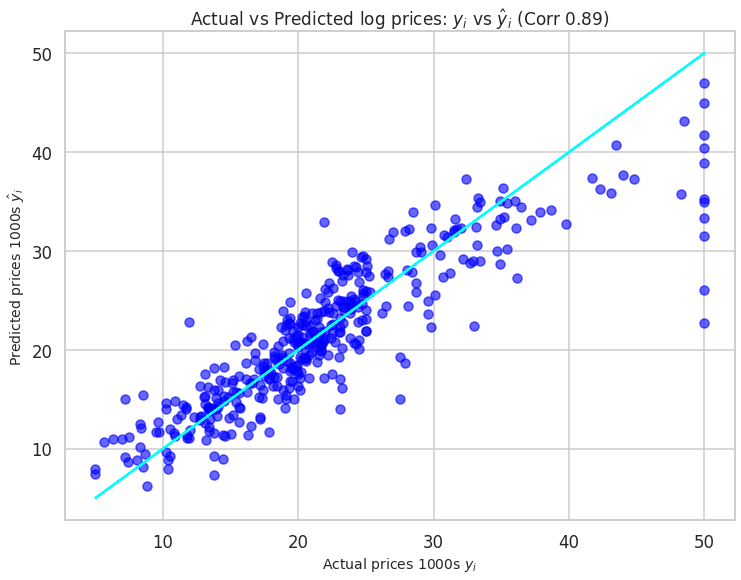

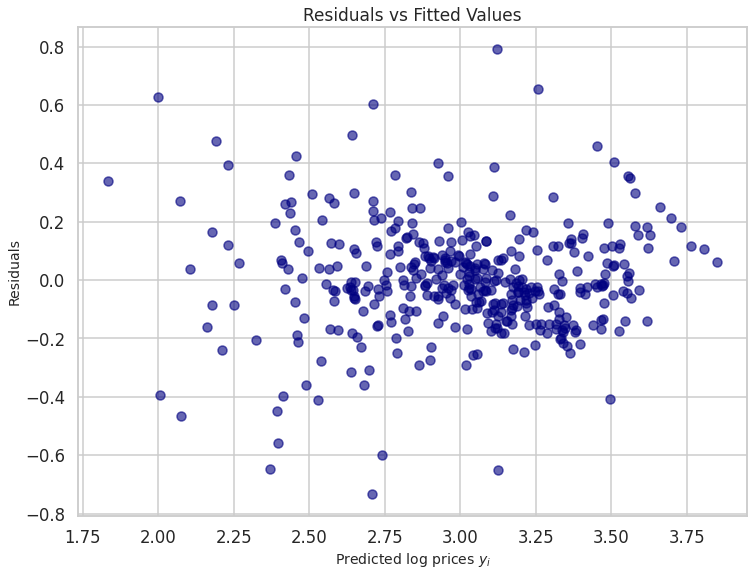

In [91]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# residuals.describe()
# results.resid

# Graph of Actual vs Predicted Prices
corr =round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,9))
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)
plt.show()

plt.figure(figsize=(12,9))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="blue", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 1000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 1000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(12,9))
plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.6)

plt.xlabel('Predicted log prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values', fontsize=17)

plt.show()

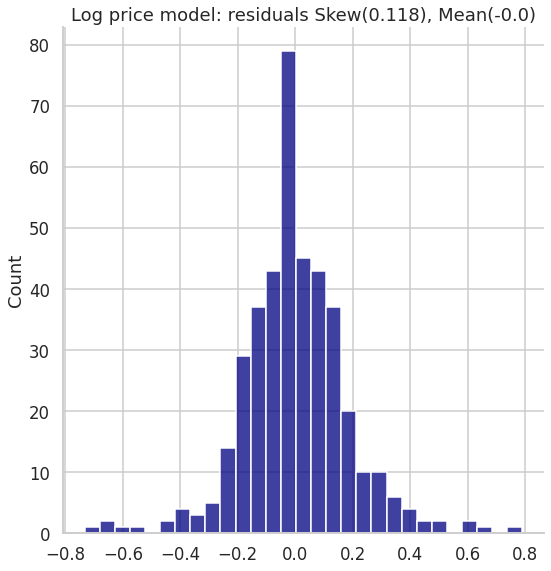

In [98]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='navy', height=8)
plt.title(f'Log price model: residuals Skew({resid_skew}), Mean({resid_mean})')
plt.show()

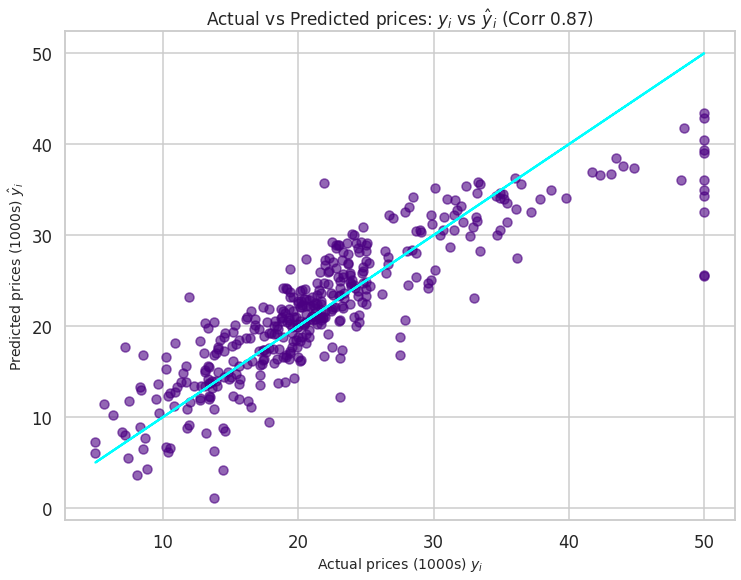

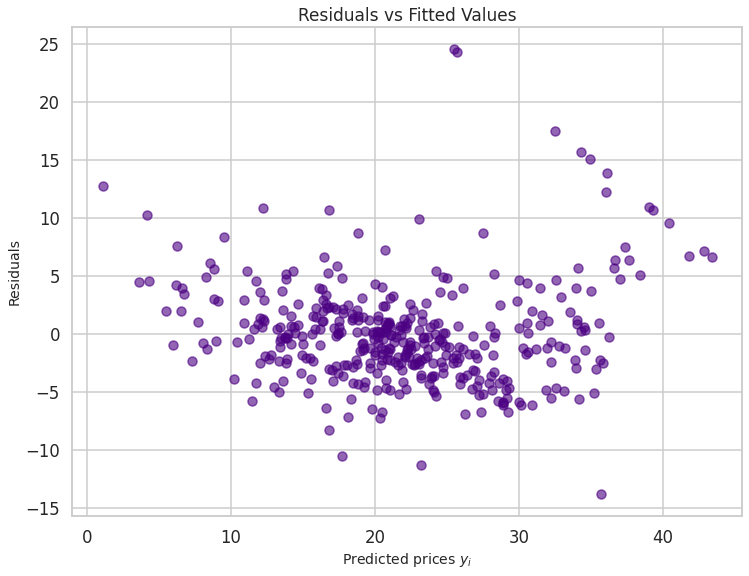

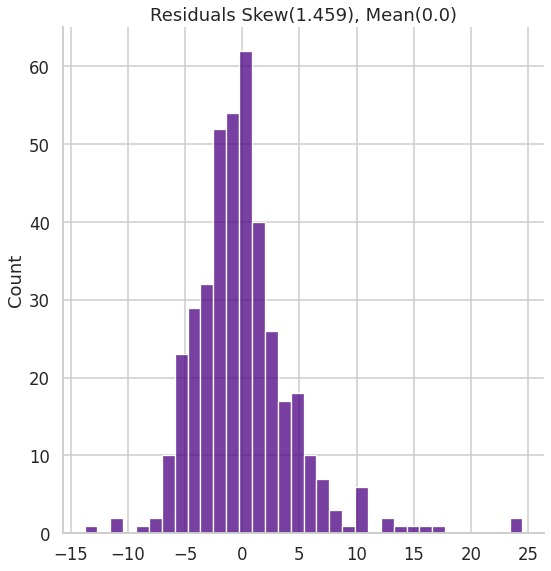

In [101]:
# Original Model: normal prices and all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr =round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,9))
plt.scatter(x=y_train, y=results.fittedvalues, c="indigo", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices (1000s) $y _i$', fontsize=14)
plt.ylabel('Predicted prices (1000s) $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(12,9))
plt.scatter(x=results.fittedvalues, y=results.resid, c="indigo", alpha=0.6)

plt.xlabel('Predicted prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='indigo', height=8)
plt.title(f'Residuals Skew({resid_skew}), Mean({resid_mean})')
plt.show()

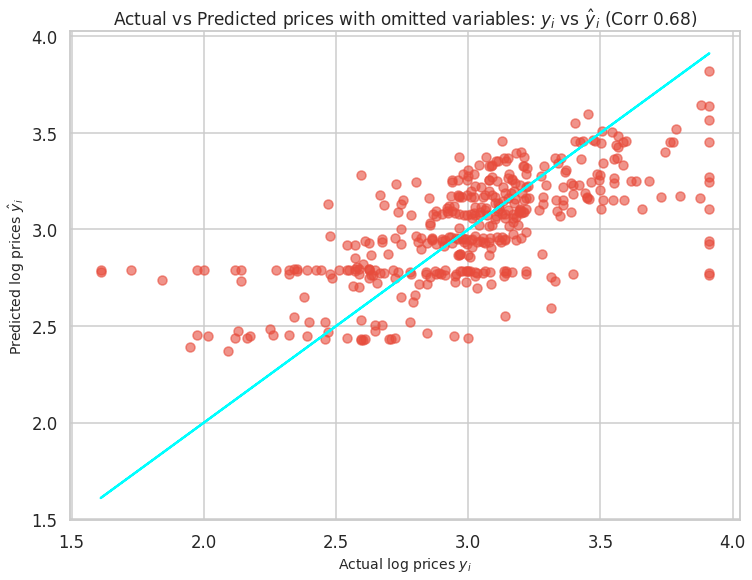

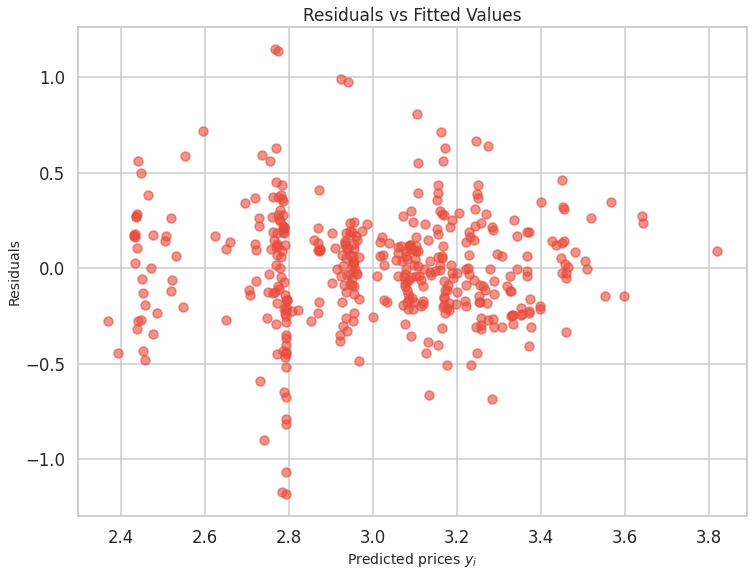

In [102]:
# Model Omitting Key features using: log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr =round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,9))
plt.scatter(x=y_train, y=results.fittedvalues, c="#e74c3c", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(12,9))
plt.scatter(x=results.fittedvalues, y=results.resid, c="#e74c3c", alpha=0.6)

plt.xlabel('Predicted prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values', fontsize=17)

plt.show()